In [1]:
# Importar bibliotecas necessárias
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import matplotlib.pyplot as plt

# Carregar o dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

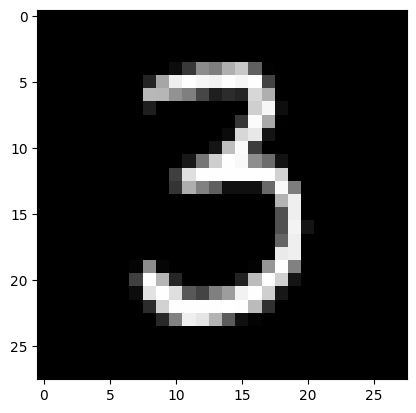

In [2]:
# Mostrando um exemplo de imagem do dataset
img = x_train[50]
plt.imshow(img, cmap='gray')
plt.show()

In [3]:
# Formatar dados para ser usado pelo modelo (Transformando a imagem 2d em um numpy array)
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [4]:
# Converter os rótulos para o formato categórico
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [5]:
# Criar o modelo
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [6]:
# Compilar o modelo
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

In [7]:
# Treinar o modelo
model.fit(x_train, y_train,
          batch_size=128,
          epochs=20,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 2s 2ms/step - loss: 2.0469 - accuracy: 0.5082 - val_loss: 1.7865 - val_accuracy: 0.6915
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 1.5984 - accuracy: 0.7141 - val_loss: 1.3947 - val_accuracy: 0.7622
Epoch 3/20
469/469 [==============================] - 1s 2ms/step - loss: 1.2672 - accuracy: 0.7714 - val_loss: 1.1175 - val_accuracy: 0.8017
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 1.0413 - accuracy: 0.8022 - val_loss: 0.9350 - val_accuracy: 0.8287
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 0.8910 - accuracy: 0.8220 - val_loss: 0.8115 - val_accuracy: 0.8419
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 0.7874 - accuracy: 0.8365 - val_loss: 0.7246 - val_accuracy: 0.8522
Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 0.7124 - accuracy: 0.8467 - val_loss: 0.6602 - val_accuracy: 0.8616
Epoch 

In [8]:
# Avaliar o modelo
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.38834407925605774
Test accuracy: 0.9010999798774719
